In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

train_df, test_df = train_test_split(iris_df, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (120, 5)
Testing set shape: (30, 5)


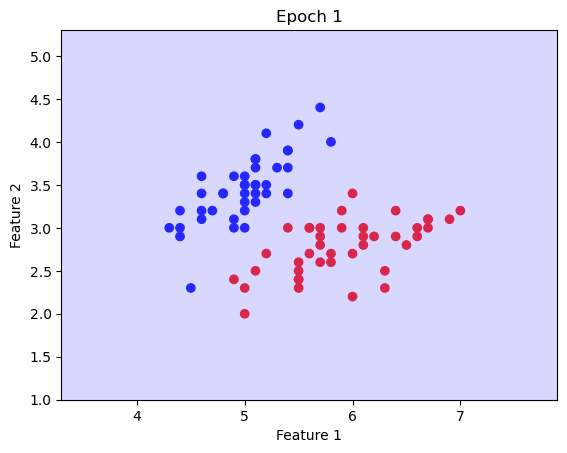

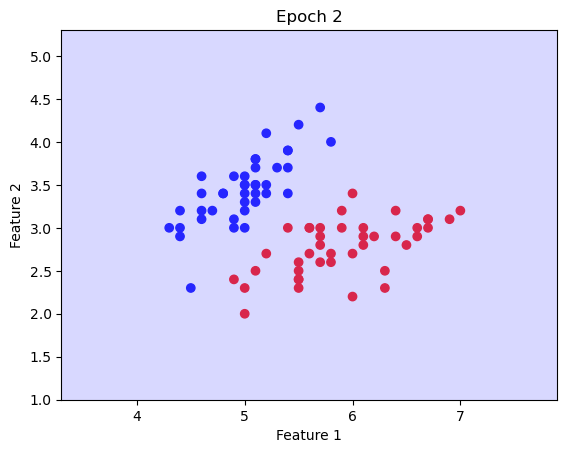

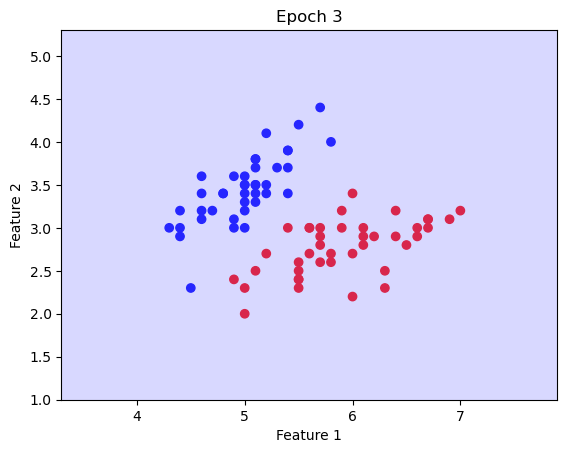

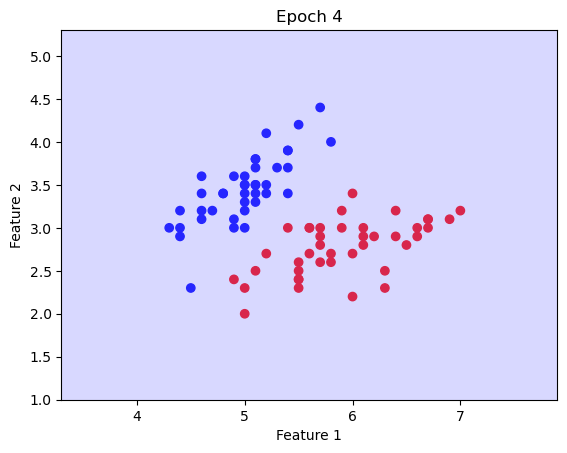

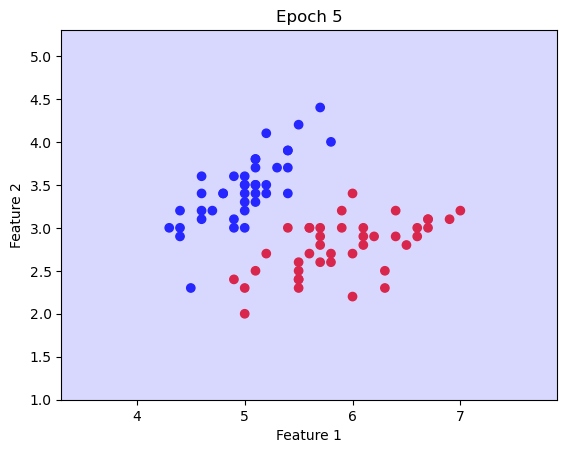

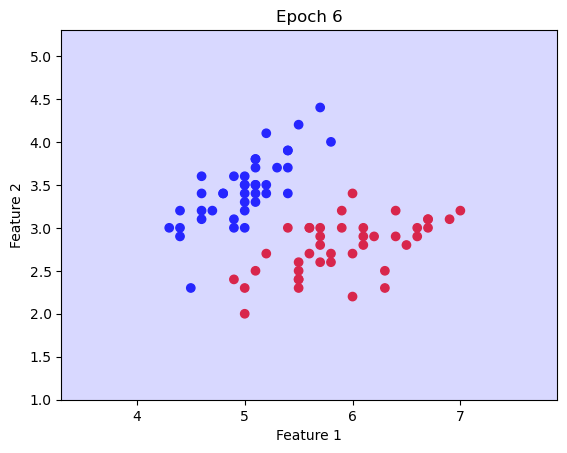

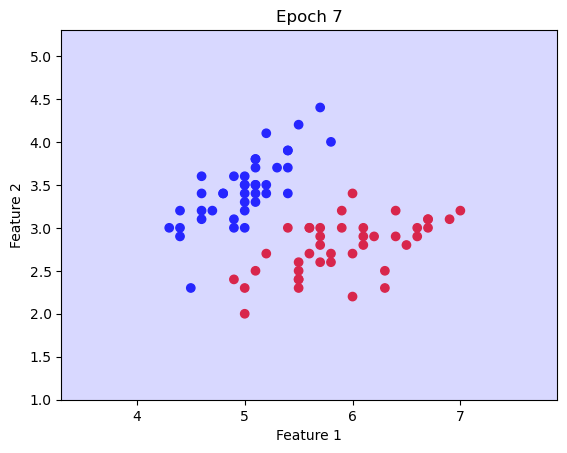

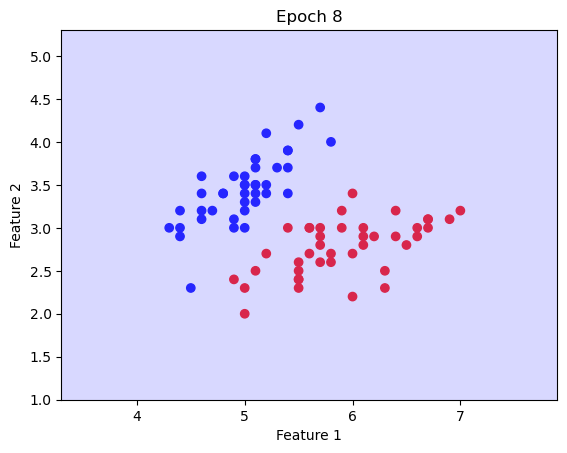

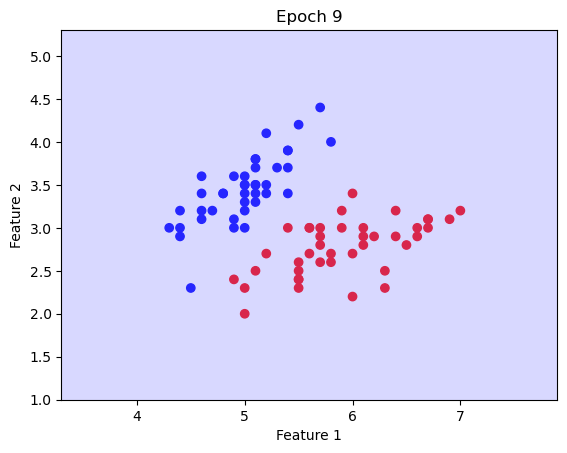

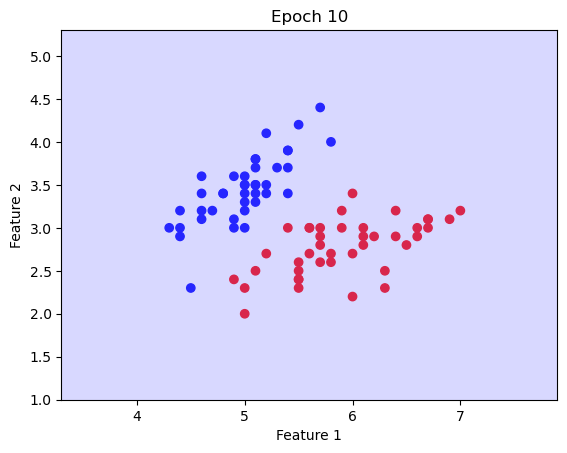

In [2]:
import numpy as np
import matplotlib.pyplot as plt

train_df = train_df[train_df['target'] < 2]
test_df = test_df[test_df['target'] < 2]
X_train = train_df.iloc[:, [0, 1]].values
y_train = train_df['target'].values
X_test = test_df.iloc[:, [0, 1]].values
y_test = test_df['target'].values

y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.errors.append(cost)

            self.plot_decision_boundary(X, y, epoch)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


    def plot_decision_boundary(self, X, y, epoch):
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                               np.arange(x2_min, x2_max, 0.1))
        Z = self.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='bwr')
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title(f'Epoch {epoch + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.savefig(f'epoch_{epoch + 1}.png') 
        plt.show()

adaline = Adaline(learning_rate=0.01, epochs=10)
adaline.fit(X_train, y_train)


Perceptron Training Accuracy: 0.9876543209876543
Perceptron Testing Accuracy: 1.0


/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_45741/3562519603.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


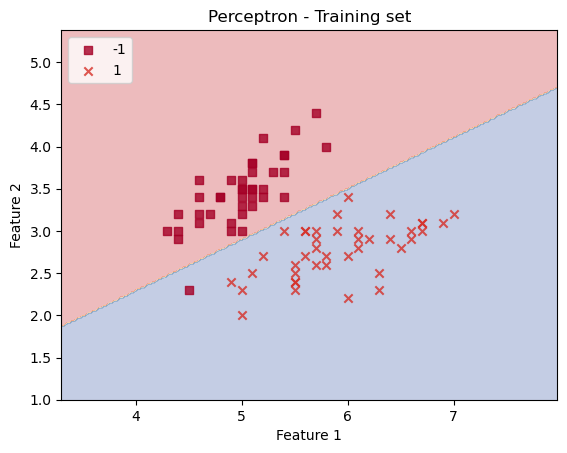

/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_45741/3562519603.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


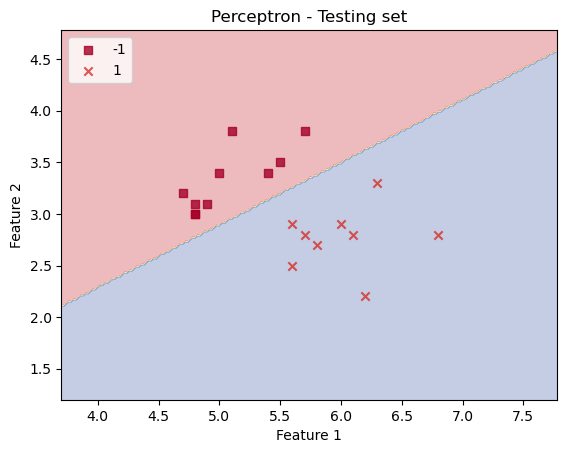

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import itertools
import numpy as np
import matplotlib.pyplot as plt


perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

print("Perceptron Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Perceptron Testing Accuracy:", accuracy_score(y_test, y_pred_test))

def plot_decision_regions(X, y, classifier, title, filename, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx / 10),
                    marker=markers[idx], 
                    label=cl)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.savefig(filename)
    plt.show()

plot_decision_regions(X_train[:, :2], y_train, classifier=perceptron, title='Perceptron - Training set', filename='perceptron_training_set.png')

plot_decision_regions(X_test[:, :2], y_test, classifier=perceptron, title='Perceptron - Testing set', filename='perceptron_testing_set.png')


Adaline Training Accuracy: 0.0
Adaline Testing Accuracy: 0.0


/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_45741/454540464.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


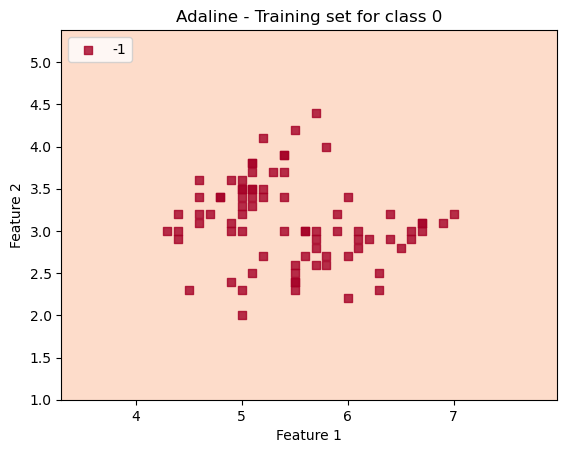

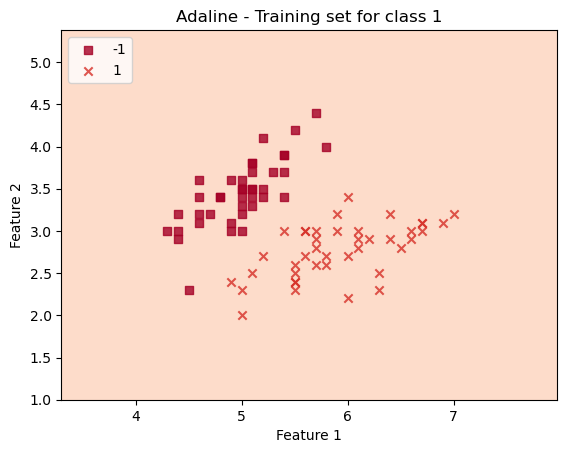

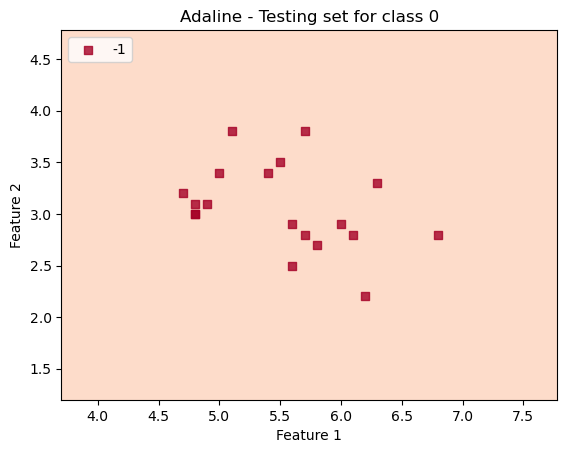

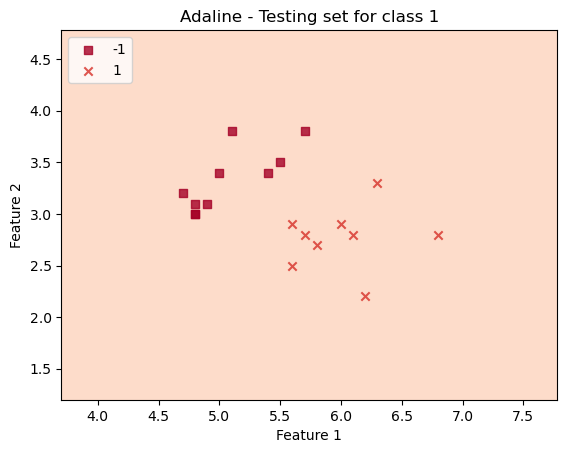

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.errors.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

def train_adaline(X, y, class_label, learning_rate=0.01, epochs=50):
    y_binary = np.where(y == class_label, 1, -1)
    adaline = Adaline(learning_rate=learning_rate, epochs=epochs)
    adaline.fit(X, y_binary)
    return adaline

adalines = [train_adaline(X_train, y_train, i) for i in np.unique(y_train)]

def predict_adalines(adalines, X):
    predictions = np.array([adaline.net_input(X) for adaline in adalines])
    return np.argmax(predictions, axis=0)

y_pred_train_adaline = predict_adalines(adalines, X_train)
y_pred_test_adaline = predict_adalines(adalines, X_test)

print("Adaline Training Accuracy:", accuracy_score(y_train, y_pred_train_adaline))
print("Adaline Testing Accuracy:", accuracy_score(y_test, y_pred_test_adaline))

def plot_decision_regions(X, y, classifier, title, filename, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx / 10),
                    marker=markers[idx], 
                    label=cl)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.savefig(filename)
    plt.show()

for i, adaline in enumerate(adalines):
    plot_decision_regions(X_train[:, :2], np.where(y_train == i, 1, -1), classifier=adaline,
                          title=f'Adaline - Training set for class {i}', filename=f'adaline_training_set_class_{i}.png')

for i, adaline in enumerate(adalines):
    plot_decision_regions(X_test[:, :2], np.where(y_test == i, 1, -1), classifier=adaline,
                          title=f'Adaline - Testing set for class {i}', filename=f'adaline_testing_set_class_{i}.png')


1/1 [==============================] - 0s 72ms/step - loss: 0.5041 - accuracy: 0.7500
Accuracy: 75.00%
1/1 [==============================] - 0s 42ms/step
Predictions: 
[[0.37079158]
 [0.37079158]
 [0.9073407 ]
 [0.37097496]]


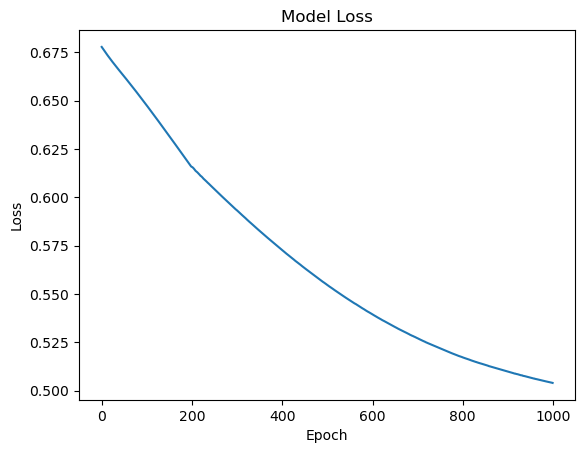

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))  # output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=1000, verbose=0)

loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy * 100:.2f}%')

predictions = model.predict(X)
print(f'Predictions: \n{predictions}')

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('model_loss.png')

plt.show()
